In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math
from qiskit.quantum_info import Kraus, SuperOp
import scipy.fftpack as sft

# importing Qiskit
from qiskit.providers.ibmq import least_busy
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.visualization import plot_histogram

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError, pauli_error, depolarizing_error, thermal_relaxation_error)

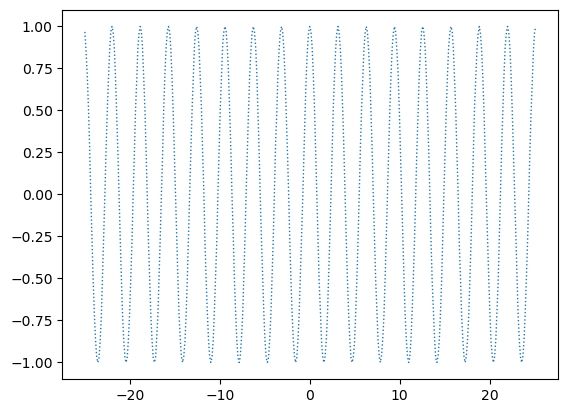

In [7]:
list1 = []
list2 = []
for i in range (1,385,1):
    qpe = QuantumCircuit(1, 1)
    qpe.h(0)
    qpe.rz((-16+(i/12.0))*math.pi,0)
    list1.append((-16+(i/12.0))*math.pi/2)
    qpe.ry(math.pi/2,0)
    qpe.measure(0,0)
    
    aer_sim = Aer.get_backend('aer_simulator')
    shots = 4096
    t_qpe = transpile(qpe, aer_sim)
    qobj = assemble(t_qpe, shots=shots)
    results = aer_sim.run(qobj).result()
    answer = results.get_counts()

    if len(answer) == 1:
        lst = list(answer.keys())
        if int(lst[0]) == 1:
                answer['0'] = 0
        elif int(lst[0]) == 0:
                answer['1'] = 0
    a = answer['1']
    b = answer['0']
    y = (a**2-b**2)/(shots**2)
    list2.append(y)

xvals = list1
yvals = list2

# Use matplotlib to display it nicely
fig, ax = plt.subplots()
ax.plot(xvals, yvals, linewidth=1, linestyle='dotted')

 # Fourier Transform

C:\Users\dell\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-5.0, 5.0)

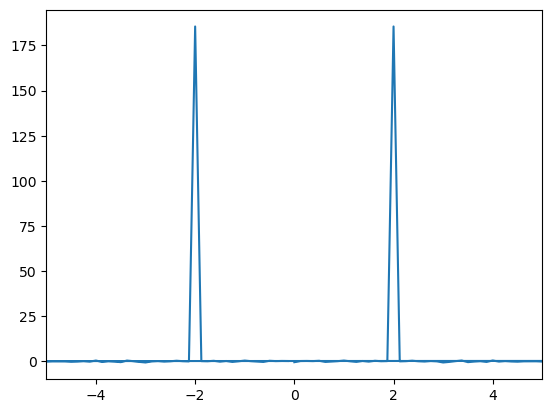

In [3]:
dx = xvals[1]-xvals[0]
N = len(xvals)
y_k = sft.fft(yvals)
psi = sft.fftfreq(N, dx)
k = 2*np.pi*psi
plt.plot(k, y_k)
plt.xlim(-5,5)

# Include Noise

In [4]:
from qiskit import IBMQ, QuantumCircuit
from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.noise import NoiseModel

list1 = []
list2 = []

provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_manila')
noise_model = NoiseModel.from_backend(backend)

sim = AerSimulator(noise_model=noise_model)

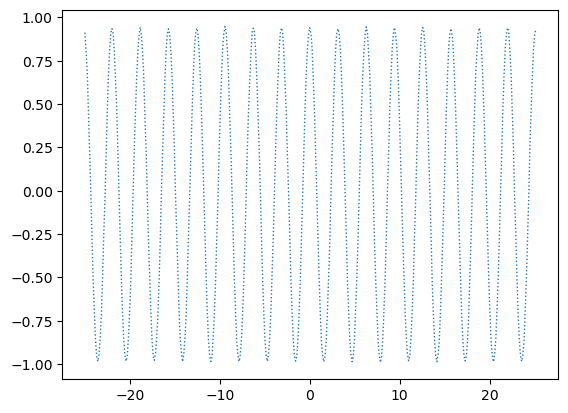

In [5]:
shots = 4096
for i in range (1,385,1):
    qpe = QuantumCircuit(1, 1)
    qpe.h(0)
    qpe.rz((-16+(i/12.0))*math.pi,0)
    list1.append((-16+(i/12.0))*math.pi/2)
    qpe.ry(math.pi/2,0)
    qpe.measure(0,0)
    
    answer = sim.run(qpe, shots = shots).result().get_counts()
    
    if len(answer) == 1:
        lst = list(answer.keys())
        if int(lst[0]) == 1:
            answer['0'] = 0
        elif int(lst[0]) == 0:
            answer['1'] = 0
    a = answer['1']
    b = answer['0']
    y = (a**2-b**2)/(shots**2)
    list2.append(y)
    
xvals = list1
yvals = list2
# Use matplotlib to display it nicely
fig, ax = plt.subplots()
ax.plot(xvals, yvals, linewidth=1, linestyle='dotted')

C:\Users\dell\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-5.0, 5.0)

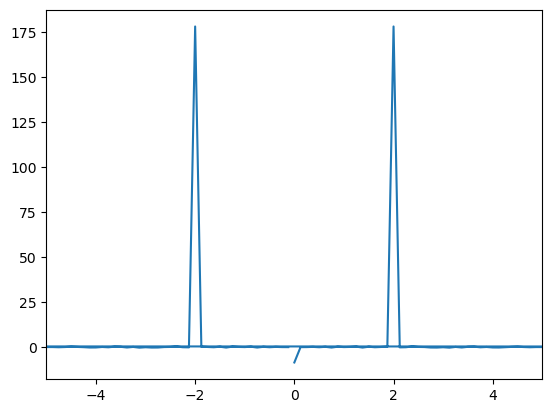

In [6]:
dx = xvals[1]-xvals[0]
N = len(xvals)
y_k = sft.fft(yvals)
psi = sft.fftfreq(N, dx)
k = 2*np.pi*psi
plt.plot(k, y_k)
plt.xlim(-5,5)